# HW5

# Student Name: Hung Yi-Le

# GITHUB: ZackLa

# 1. Decision Trees as Interpretable Models


In [1]:
import pandas as pd
import numpy as np
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import statistics
import math
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold

## (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations.


## (b) Build a decision tree on the whole data set and plot it.1

In [2]:
d =  pd.read_csv('../data/diagnosis.data', header = None, encoding = "utf_16", sep = " ")

In [3]:
data = []

In [4]:
for i in range(0,len(d),1):
    data.append(d[0][i].split("\t"))

In [5]:
d2 = pd.DataFrame(data)

In [6]:
d2 = d2.apply(lambda x: x.str.replace(',','.'))

In [7]:
d2

,0,1,2,3,4,5,6,7
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [8]:
with open('../data/diagnosis.names', 'r') as fp:
    x = fp.readlines()[81:89]

In [9]:
c_names = []
for i in range(0,len(x),1):
    x[i] = x[i].split(" {")
    x[i][0] = x[i][0].split(" ",1)
    c_names.append(x[i][0][1])

In [10]:
d2.columns = c_names
d2 = d2.replace(["no","yes"],["0","1"])

In [11]:
d2

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [12]:
conditions = [
(d2['decision: Inflammation of urinary bladder'] == '0') & (d2['decision: Nephritis of renal pelvis origin'] == '0'),
(d2['decision: Inflammation of urinary bladder'] == '0') & (d2['decision: Nephritis of renal pelvis origin'] == '1'),
(d2['decision: Inflammation of urinary bladder'] == '1') & (d2['decision: Nephritis of renal pelvis origin'] == '0'),
(d2['decision: Inflammation of urinary bladder'] == '1') & (d2['decision: Nephritis of renal pelvis origin'] == '1')]
choices = ['0','1','2','3']
d2['label'] = np.select(conditions, choices)

In [13]:
x = d2.drop(columns = ["decision: Inflammation of urinary bladder", "decision: Nephritis of renal pelvis origin",
                       "label"])
y = d2.iloc[:, -1]

In [14]:
dtc = tree.DecisionTreeClassifier()
tree1 = dtc.fit(x,y)

[Text(0.4, 0.9, 'Lumbar pain <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 31, 40, 19]\nclass = 2'),
 Text(0.2, 0.7, 'Temperature of patient <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 0, 40, 0]\nclass = 2'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40, 0]\nclass = 2'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.6, 0.7, 'Temperature of patient <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 31, 0, 19]\nclass = 1'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.7, 0.5, 'Occurrence of nausea <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 31, 0, 19]\nclass = 1'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0]\nclass = 1'),
 Text(0.8, 0.3, 'Urine pushing (continuous need for urination) <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 10, 0, 19]\nclass = 3'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]\nclass = 1'),
 Text(0.9, 0.1, 'gini =

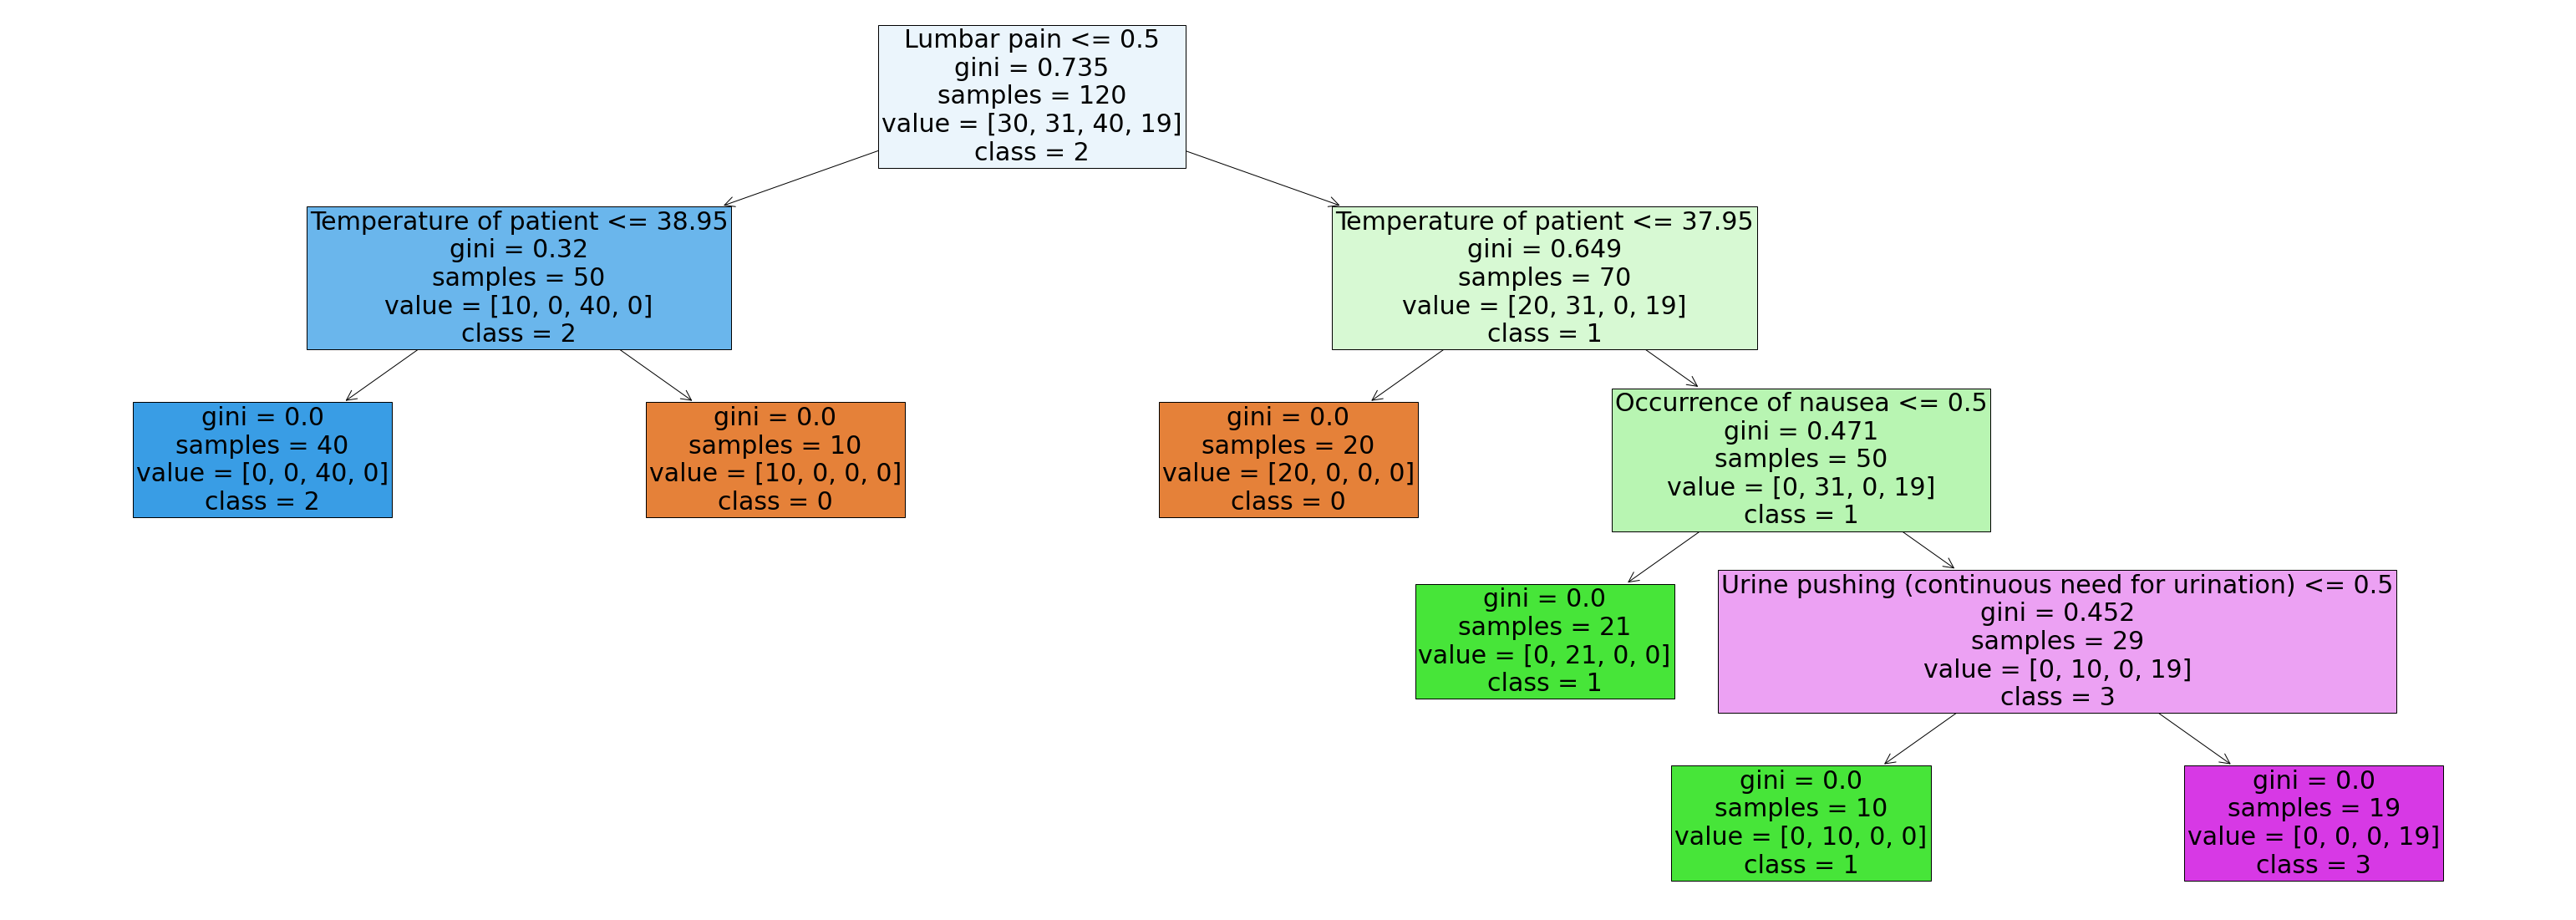

In [15]:
plt.figure(figsize=(55,20))
tree.plot_tree(tree1, filled = True, feature_names = c_names, class_names = choices, fontsize = 30)

### The decision tree is shown as above

## (c) Convert the decision rules into a set of IF-THEN rules.2

In [16]:
def tree_to_pseudo(tree, feature_names):
    choices = ['0','1','2','3']
    
    '''
    Outputs a decision tree model as if/then pseudocode
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print (indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print (indent,"}")
        else:
            print(indent,"return " + str(value[node]))
            op = value[node][0]
            print(indent,"then", choices[np.argmax(op)])

    recurse(left, right, threshold, features, 0)

In [17]:
tree_to_pseudo(tree1,c_names)

 if ( Lumbar pain <= 0.5 ) {
   if ( Temperature of patient <= 38.95000076293945 ) {
     return [[ 0.  0. 40.  0.]]
     then 2
   } else {
     return [[10.  0.  0.  0.]]
     then 0
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
     then 0
   } else {
     if ( Occurrence of nausea <= 0.5 ) {
       return [[ 0. 21.  0.  0.]]
       then 1
     } else {
       if ( Urine pushing (continuous need for urination) <= 0.5 ) {
         return [[ 0. 10.  0.  0.]]
         then 1
       } else {
         return [[ 0.  0.  0. 19.]]
         then 3
       }
     }
   }
 }


### IF-THEN decision tree rule is shown as above

## (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [18]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(x,y)

In [19]:
parameter = {'ccp_alpha': list(path['ccp_alphas'])}
model = GridSearchCV(clf, parameter, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
model.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.09816666666666667,
                                       0.13333333333333333, 0.18199999999999997,
                                       0.22291666666666676]},
             scoring='accuracy')

In [20]:
model.cv_results_['mean_test_score']

array([0.95833333, 0.775     , 0.71666667, 0.6       , 0.43333333])

In [21]:
list(path['ccp_alphas'])

[0.0,
 0.09816666666666667,
 0.13333333333333333,
 0.18199999999999997,
 0.22291666666666676]

In [22]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.098167)
clf.fit(x, y)
clf.get_depth()

2

In [23]:
tree_to_pseudo(clf, c_names)

 if ( Lumbar pain <= 0.5 ) {
   if ( Urine pushing (continuous need for urination) <= 0.5 ) {
     return [[10.  0.  0.  0.]]
     then 0
   } else {
     return [[ 0.  0. 40.  0.]]
     then 2
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
     then 0
   } else {
     return [[ 0. 31.  0. 19.]]
     then 1
   }
 }


### The minimum dicision tree depth is 2 and the beter alpha is 0.098167. so to get the minimal decision tree then there's a trade off, that is we have to sacrifice some accuracy score in order for us to prune the tree to a minimal decisino tree that's more high interpretable.

# 2. The LASSO and Boosting for Regression

## (a) Download the Communities and Crime data from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.
## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [24]:
df =  pd.read_csv('../data/communities.data', header = None, na_values = "?")

In [25]:
with open('../data/communities.names', 'r') as fp:
    x = fp.readlines()[75:203]


In [26]:
c_names1 = []
for i, k in enumerate(x):
    c1 = k.split(" ")
    c_names1.append(c1[1])

In [27]:
df.columns = c_names1

In [28]:
df1 = df.drop(columns = ['state', 'county', 'community', 'communityname', 'fold'])
df1_1 = df1.copy()
df1_1 = df1_1.fillna(df1_1.mean())

In [29]:
train = df1.iloc[:1495]
test = df1.iloc[1495:]
train_1 = train.fillna(train.mean())
test_1 = test.fillna(train.mean())

In [30]:
df1_2 = pd.concat([train_1, test_1], axis=0)

In [31]:
df1_2

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


### The whole data set dataframe is shown as above

## (c) Plot a correlation matrix for the features in the data set.

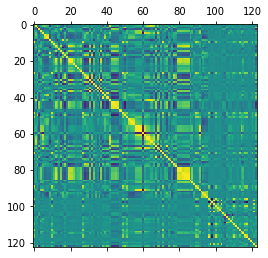

In [32]:
plt.matshow(df1_2.corr())

### The correlation matrix plot is shown as above

## (d) Calculate the Coefficient of Variation CV for each feature, where CV = m/s , in which s is sample standard deviation and m is sample mean..

In [79]:
df1_1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [33]:
std = []
mean = []
cv = []
for i in df1_1.columns:
    std.append(statistics.stdev(df1_1[i]))
    mean.append(statistics.mean(df1_1[i]))
    k = statistics.stdev(df1_1[i])/statistics.mean(df1_1[i])
    cv.append(k)

In [34]:
df2 = pd.DataFrame()
df2 = df2.assign(SampleStd = std, SampleMean = mean, Coefficient_of_variation = cv)

In [35]:
df2 = df2.set_axis(df1_1.columns)

In [36]:
df2

,SampleStd,SampleMean,Coefficient_of_variation
population,0.126906,0.057593,2.203503
householdsize,0.163717,0.463395,0.353298
racepctblack,0.253442,0.179629,1.410920
racePctWhite,0.244039,0.753716,0.323782
racePctAsian,0.208877,0.153681,1.359162
...,...,...,...
LemasPctPolicOnPatr,0.085459,0.698589,0.122331
LemasGangUnitDeploy,0.162099,0.440439,0.368040
LemasPctOfficDrugUn,0.240328,0.094052,2.555266
PolicBudgPerPop,0.065796,0.195078,0.337281


### CV of each feature is calculated in the above table

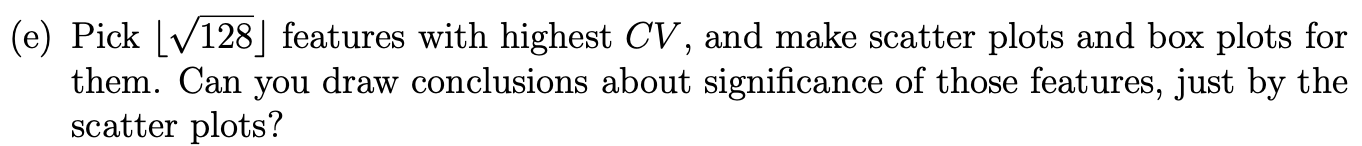

In [37]:
round(math.sqrt(128))

11

In [38]:
df2['Coefficient_of_variation'].nlargest(11)

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
Name: Coefficient_of_variation, dtype: float64

In [39]:
df3 = pd.DataFrame(df2['Coefficient_of_variation'].nlargest(11))
df3

,Coefficient_of_variation
NumStreet,4.407702
NumInShelters,3.485481
NumIlleg,2.994196
NumImmig,2.900497
LemasPctOfficDrugUn,2.555266
NumUnderPov,2.304970
population,2.203503
numbUrban,2.001744
HousVacant,1.958780
LandArea,1.678031


In [40]:
df3_1 = df1_1[df3.index]

In [41]:
df3_1

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


In [42]:
df3_1

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


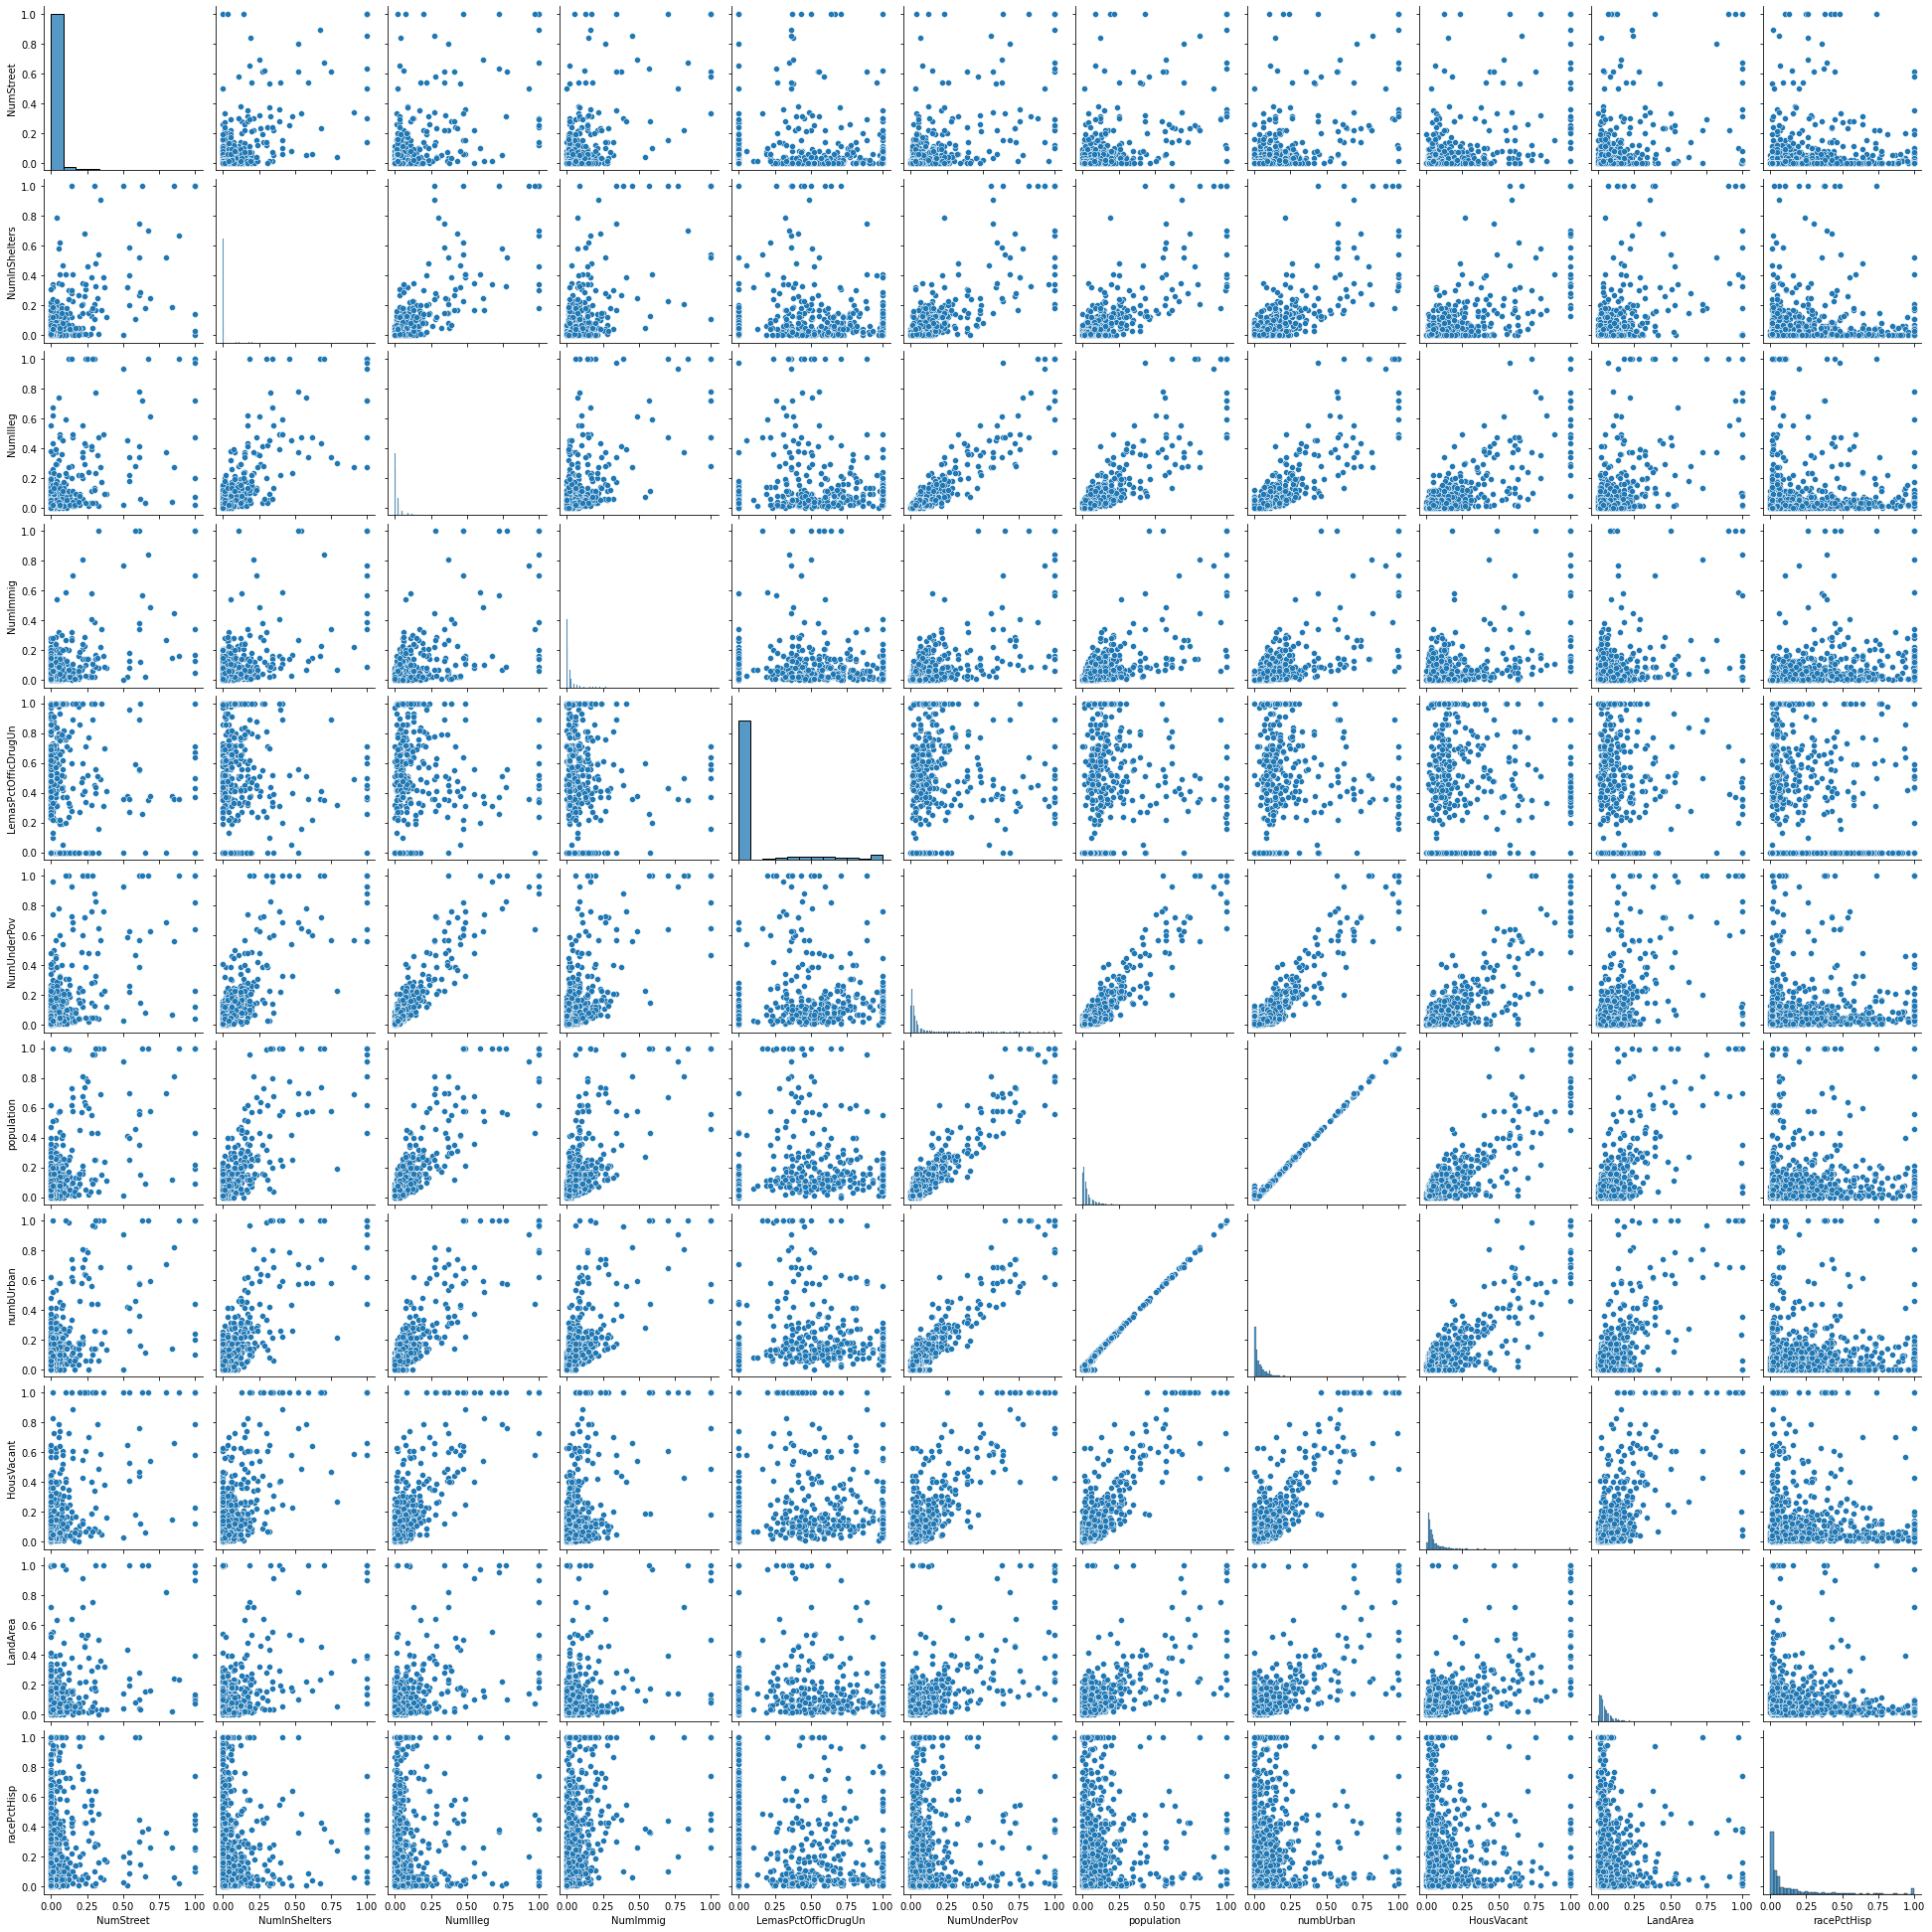

In [43]:
sns.pairplot(df3_1)

### The scatter plot of the highest CV features is shown as above

<AxesSubplot:>

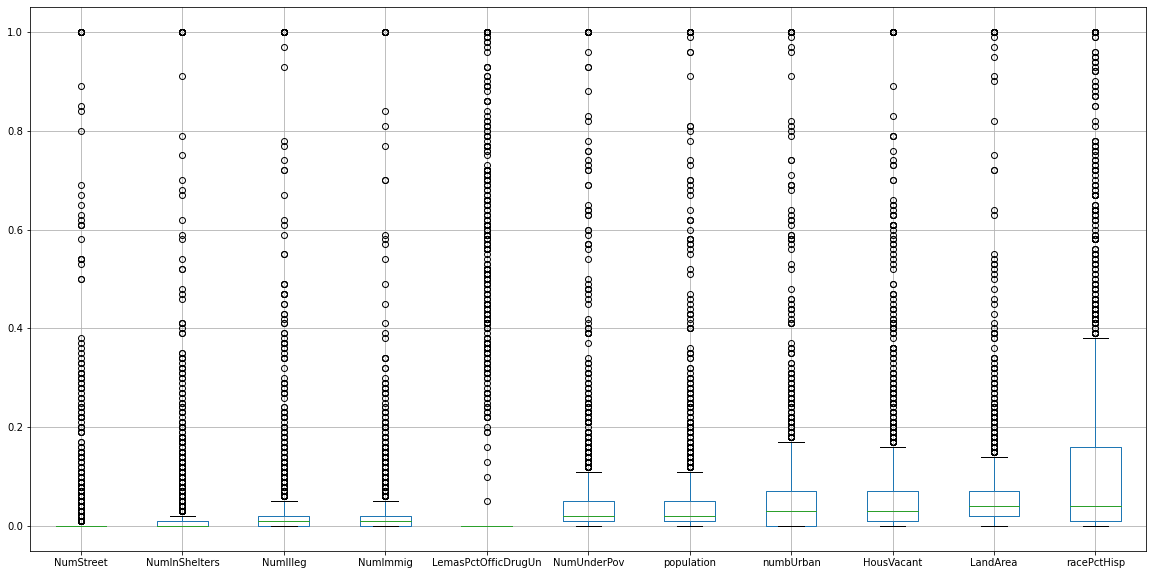

In [44]:
plt.figure(figsize=(20,10))
df3_1.boxplot()

### The box plot of the highest CV features is shown as above

## (f) Fit a linear model using least squares to the training set and report the test error.


In [45]:
df2_2 = df1.copy()

In [46]:
train = df1.iloc[:1495]
test = df1.iloc[1495:]
train_1 = train.fillna(train.mean())
test_1 = test.fillna(train.mean())
x_train = train_1.iloc[:,:122]
x_test = test_1.iloc[:,:122]
y_train = train_1.iloc[:,-1]
y_test = test_1.iloc[:,-1]

In [47]:
reg = LinearRegression().fit(x_train, y_train)

In [48]:
y_pred = reg.predict(x_test)

In [49]:
mean_squared_error(y_test, y_pred)

1.560569771296491e+18

### For some reason the test error is very huge, and I can't find why, I checked all of my data, x_test, x_train, y_train, y_pred. All of values in there are normal. I know that for sure, because for the next following question, I was able to find a more resonable test error for ridge regresssion.

## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [50]:
#Scale dataframe
#df1_3 = pd.DataFrame(scale(df1))

In [51]:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = 5).fit(x_train, y_train)

In [52]:
y_pred1 = ridge.predict(x_test)

In [53]:
mean_squared_error(y_test, y_pred1)

0.017732474992896645

In [54]:
ridge.alpha_

1.0

### The test error is about 0.017732474992896645 and the lmbda is 1

## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [55]:
lasso = LassoCV(cv = 5, random_state=0, max_iter = 1500).fit(x_train, y_train)

In [56]:
y_pred2 = lasso.predict(x_test)
mean_squared_error(y_test, y_pred2)

0.017758209216319674

In [57]:
lasso.alpha_

0.00011614723626829846

### The test error of the lasso is above 0.017758209216319674 and the lambda is about 0.00011614723626829846

In [58]:
var = []
coef_ = lasso.coef_
for i, k in enumerate(coef_):
    if k != 0:
        var.append(x_test.columns[i])

In [59]:
scale= StandardScaler()

In [60]:
x_trainh = scale.fit_transform(x_train)
x_testh = scale.fit_transform(x_test)

In [61]:
x_trainh

array([[ 1.01164520e+00, -8.02125337e-01, -6.22224215e-01, ...,
         2.93444241e-01,  9.52017784e-01, -8.16365776e-01],
       [-4.46357838e-01, -1.83726373e+00, -2.32943498e-01, ...,
         3.38536801e-16, -3.91835475e-01,  4.46449281e-16],
       [-4.46357838e-01, -2.54110896e-01,  1.20739516e+00, ...,
         3.38536801e-16, -3.91835475e-01,  4.46449281e-16],
       ...,
       [-3.69620837e-01, -6.19453856e-01,  2.99808645e+00, ...,
         3.38536801e-16, -3.91835475e-01,  4.46449281e-16],
       [ 1.40641729e-02,  4.15684533e-01, -6.61152287e-01, ...,
         3.38536801e-16, -3.91835475e-01,  4.46449281e-16],
       [-6.26728290e-02, -1.93220402e-01, -3.88655785e-01, ...,
        -2.75582418e+00,  1.74993066e+00, -1.72964554e-01]])

In [62]:
lasso = LassoCV(cv = 5, random_state=0, max_iter = 1500).fit(x_trainh, y_train)

In [63]:
y_pred3 = lasso.predict(x_testh)
mean_squared_error(y_test, y_pred3)

0.017992169830321397

In [64]:
lasso.alpha_

0.0007630833878262516

### The test error of standardized features data is above 0.017758209216319674 and the lambda is about 0.00011614723626829846

## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [65]:
pca = PCA()
x_trainp = pca.fit_transform(x_train)

In [66]:
pipe = Pipeline([('pca', PCA()), ('linear' ,LinearRegression())])

In [67]:
pipe.fit(x_train, y_train)
y_pred4 = pipe.predict(x_test)

In [68]:
pca_list = list(range(1, len(x_test.columns), 1))
parameter = {'pca__n_components': pca_list}
model = GridSearchCV(pipe, parameter)
model.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('linear', LinearRegression())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [69]:
model.best_params_

{'pca__n_components': 96}

In [70]:
mean_squared_error(y_test, y_pred4)

9.043985276419142e+17

### For some reason the test error is very huge and I can't find why, again, I checked all of my data, x_test, x_train, y_train, y_pred. All of values in there are normal. The 96 is the number of principal components chosen by cross-validation.

## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [71]:
lambdas=[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 2, 3, 4, 5, 10, 20]
xgb = XGBRegressor(random_state = 0, reg_alpha = i)
xgb.fit(x_train, y_train)
pca_list = list(range(1, len(x_test.columns), 1))
parameter = {'reg_alpha': lambdas}
model = GridSearchCV(xgb, parameter, scoring = "neg_mean_squared_error")
model.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=121, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             param_grid

In [72]:
lambdas

[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2, 1.4, 1.6, 1.8, 2, 3, 4, 5, 10, 20]

In [73]:
model.cv_results_['mean_test_score']

array([-0.02253689, -0.02236885, -0.02272069, -0.02226614, -0.0224589 ,
       -0.02199075, -0.02171475, -0.02225051, -0.02123845, -0.02079372,
       -0.02080121, -0.02120229, -0.02063119, -0.02078803, -0.02204879,
       -0.0248159 ])

In [74]:
df5 = pd.DataFrame()

In [75]:
df5 = df5.assign(alpha = lambdas, MSE = -model.cv_results_['mean_test_score'])

In [76]:
df5

,alpha,MSE
0,0.01,0.022537
1,0.05,0.022369
2,0.10,0.022721
3,0.20,0.022266
4,0.50,0.022459
5,0.75,0.021991
6,1.20,0.021715
7,1.40,0.022251
8,1.60,0.021238
9,1.80,0.020794


In [77]:
df5[df5.MSE == df5.MSE.min()]

,alpha,MSE
12,4.0,0.020631


### The best alpha value is 4 with a MSE score that's about 0.020631